In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'D:\Python\bike-sharing-demand\train.csv')
test = pd.read_csv(r'D:\Python\bike-sharing-demand\test.csv')

In [3]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [5]:
datetimecol = test["datetime"]

In [6]:
print('train_null : ', train.isnull().sum())
print('\n')
print('test_null : ', test.isnull().sum())

train_null :  datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


test_null :  datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [7]:
y_shape = train['count'].shape[0]
y_shape

10886

In [8]:
data = train.append(test)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [9]:
data = data.drop(['casual', 'registered'], axis=1)
data.reset_index(inplace=True)
data = data.drop(['index'], axis=1)

In [10]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0


### 先處裡時間

In [11]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [12]:
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data['week'] = data['datetime'].dt.dayofweek
data['year'] = data['datetime'].dt.year
data['weekofyear'] = data['datetime'].dt.weekofyear
data['day'] = data['datetime'].dt.day
data['date'] = data['datetime'].dt.date

In [13]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,0,1,5,2011,52,1,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,1,5,2011,52,1,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,2,1,5,2011,52,1,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,3,1,5,2011,52,1,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,4,1,5,2011,52,1,2011-01-01


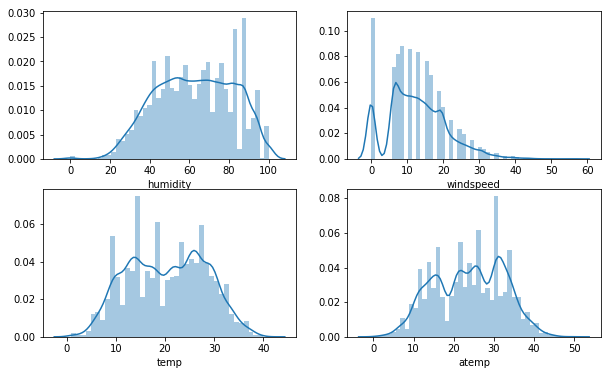

In [14]:
plt.figure(figsize=(10, 6))
cols = ['humidity', 'windspeed', 'temp', 'atemp']
for index, cols in enumerate(cols):
    plt.subplot(2, 2, index+1)
    sns.distplot(data[cols])

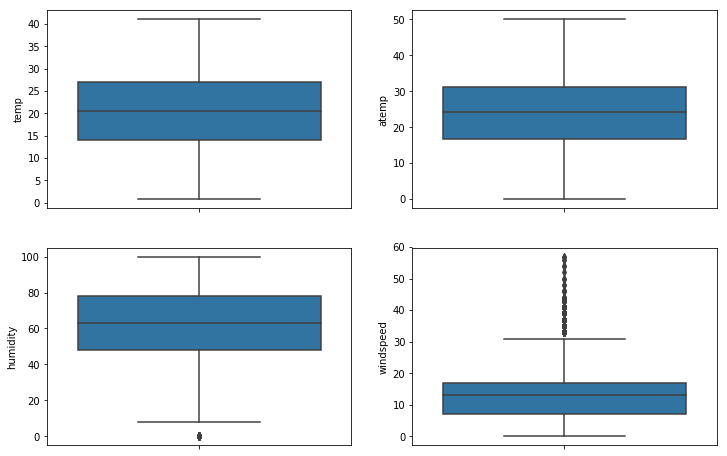

In [15]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(12, 8))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    sns.boxplot(data[col], orient='v')

#### humidity跟windspeed有數值為零需要處裡

In [16]:
data[data['humidity']!=0].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day
count,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,10864.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
mean,2.503543,0.028807,0.682318,1.423403,20.382081,23.794466,62.802385,12.730444,191.904731,11.545889,6.542260,3.011465,2011.503198,26.622976,15.690615
std,1.106327,0.167268,0.465588,0.637492,7.898036,8.596065,19.175450,8.196926,181.174729,6.914537,3.438645,2.003234,0.500004,15.014875,8.792611
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,8.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,43.000000,6.000000,4.000000,1.000000,2011.000000,14.000000,8.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,146.000000,12.000000,7.000000,3.000000,2012.000000,27.000000,16.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,284.000000,18.000000,10.000000,5.000000,2012.000000,40.000000,23.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,977.000000,23.000000,12.000000,6.000000,2012.000000,52.000000,31.000000


#### 看看humidity為0的時候

In [17]:
data[data['humidity']==0].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day
count,22.0,22.0,22.0,22.000000,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.0,22.0,22.0,22.0,22.0
mean,1.0,0.0,1.0,2.909091,15.952727,19.283409,0.0,17.545777,28.318182,12.227273,3.0,3.0,2011.0,10.0,10.0
std,0.0,0.0,0.0,0.294245,1.595011,2.357861,0.0,6.660129,26.895541,6.934605,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,1.0,2.000000,13.940000,15.910000,0.0,6.003200,1.000000,0.000000,3.0,3.0,2011.0,10.0,10.0
25%,1.0,0.0,1.0,3.000000,14.760000,16.855000,0.0,15.001300,12.000000,7.250000,3.0,3.0,2011.0,10.0,10.0
50%,1.0,0.0,1.0,3.000000,15.990000,20.075000,0.0,16.997900,22.500000,12.500000,3.0,3.0,2011.0,10.0,10.0
75%,1.0,0.0,1.0,3.000000,17.220000,21.210000,0.0,19.749925,36.250000,17.750000,3.0,3.0,2011.0,10.0,10.0
max,1.0,0.0,1.0,3.000000,18.040000,21.970000,0.0,39.000700,111.000000,23.000000,3.0,3.0,2011.0,10.0,10.0


#### 提取humidity!=0 & windspeed!=0的項次作為訓練使用

In [18]:
mask1 = data['humidity']!=0
mask2 = data['windspeed']!=0

In [19]:
data[(mask1&mask2)].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day,date
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1.0,5,1,5,2011,52,1,2011-01-01
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,36.0,10,1,5,2011,52,1,2011-01-01
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,56.0,11,1,5,2011,52,1,2011-01-01
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,84.0,12,1,5,2011,52,1,2011-01-01
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,94.0,13,1,5,2011,52,1,2011-01-01


In [20]:
data[(mask1&mask2)].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day
count,15177.000000,15177.000000,15177.000000,15177.000000,15177.000000,15177.000000,15177.000000,15177.000000,9551.000000,15177.000000,15177.000000,15177.000000,15177.000000,15177.000000,15177.000000
mean,2.468999,0.028398,0.680372,1.431245,20.426250,23.755128,62.022600,14.559025,196.139357,11.760625,6.436055,3.018054,2011.504777,26.143309,15.724320
std,1.100620,0.166113,0.466348,0.644535,7.915702,8.728117,19.101126,7.086405,181.972520,6.854613,3.429693,2.005348,0.499994,14.980873,8.760048
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,8.000000,6.003200,1.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,8.998100,47.000000,6.000000,3.000000,1.000000,2011.000000,13.000000,8.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,150.000000,12.000000,6.000000,3.000000,2012.000000,26.000000,16.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,19.001200,289.000000,18.000000,9.000000,5.000000,2012.000000,39.000000,23.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,977.000000,23.000000,12.000000,6.000000,2012.000000,52.000000,31.000000


### data_test用來訓練模型

In [21]:
data_test = data[(mask1&mask2)] #訓練使用

#### 先看humidity

In [22]:
data_humidity0 = data[data['humidity']==0]
data_humidityNot0 = data[data['humidity']!=0]

In [23]:
data_humidity0.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day
count,22.0,22.0,22.0,22.000000,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.0,22.0,22.0,22.0,22.0
mean,1.0,0.0,1.0,2.909091,15.952727,19.283409,0.0,17.545777,28.318182,12.227273,3.0,3.0,2011.0,10.0,10.0
std,0.0,0.0,0.0,0.294245,1.595011,2.357861,0.0,6.660129,26.895541,6.934605,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,1.0,2.000000,13.940000,15.910000,0.0,6.003200,1.000000,0.000000,3.0,3.0,2011.0,10.0,10.0
25%,1.0,0.0,1.0,3.000000,14.760000,16.855000,0.0,15.001300,12.000000,7.250000,3.0,3.0,2011.0,10.0,10.0
50%,1.0,0.0,1.0,3.000000,15.990000,20.075000,0.0,16.997900,22.500000,12.500000,3.0,3.0,2011.0,10.0,10.0
75%,1.0,0.0,1.0,3.000000,17.220000,21.210000,0.0,19.749925,36.250000,17.750000,3.0,3.0,2011.0,10.0,10.0
max,1.0,0.0,1.0,3.000000,18.040000,21.970000,0.0,39.000700,111.000000,23.000000,3.0,3.0,2011.0,10.0,10.0


In [24]:
data_humidityNot0.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day
count,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,10864.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
mean,2.503543,0.028807,0.682318,1.423403,20.382081,23.794466,62.802385,12.730444,191.904731,11.545889,6.542260,3.011465,2011.503198,26.622976,15.690615
std,1.106327,0.167268,0.465588,0.637492,7.898036,8.596065,19.175450,8.196926,181.174729,6.914537,3.438645,2.003234,0.500004,15.014875,8.792611
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,8.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,43.000000,6.000000,4.000000,1.000000,2011.000000,14.000000,8.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,146.000000,12.000000,7.000000,3.000000,2012.000000,27.000000,16.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,284.000000,18.000000,10.000000,5.000000,2012.000000,40.000000,23.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,977.000000,23.000000,12.000000,6.000000,2012.000000,52.000000,31.000000


#### 檢查相關係數

In [25]:
data_test.corr()['humidity'].sort_values(ascending=False)

humidity      1.000000
weather       0.454841
weekofyear    0.159873
month         0.149958
season        0.136100
day           0.029579
workingday    0.012861
holiday      -0.008405
week         -0.033270
atemp        -0.040196
temp         -0.057410
year         -0.084851
hour         -0.266336
windspeed    -0.300998
count        -0.316428
Name: humidity, dtype: float64

#### 開始代入模型

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict

In [28]:
cols = ['weather', 'season', 'weekofyear', 'month', 'windspeed', 'atemp', 'temp', 'hour']

In [29]:
rf = RandomForestRegressor(n_estimators=500)

#### 使用data_test訓練模型

In [30]:
rf.fit(data_test[cols], data_test['humidity'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
mean_squared_error(rf.predict(data_test[cols]), data_test['humidity'])

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


15.133819084500313

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


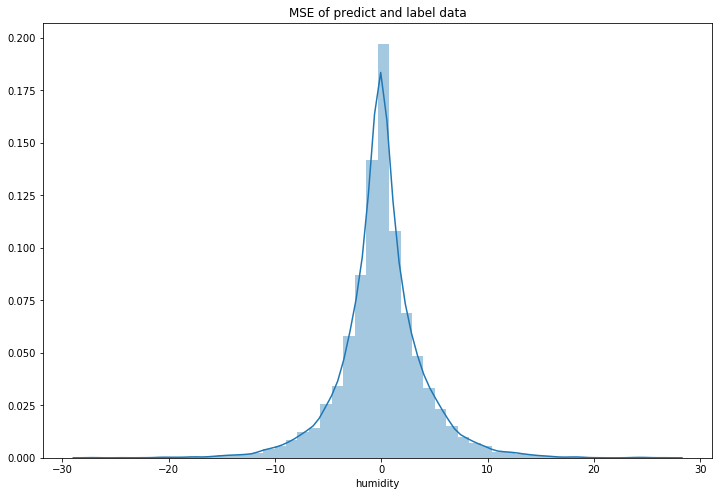

In [32]:
plt.figure(figsize=(12, 8))
plt.title('MSE of predict and label data')
sns.distplot(rf.predict(data_test[cols])-data_test['humidity'])

#### 標準差看誤差值

In [33]:
np.std(rf.predict(data_test[cols])-data_test['humidity'])

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


3.890186072507615

In [34]:
data_humidity0 = data[data['humidity']==0]
data_humidityNot0 = data[data['humidity']!=0]

In [35]:
data_humidity0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day,date
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3.0,0,3,3,2011,10,10,2011-03-10
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,2.0,1,3,3,2011,10,10,2011-03-10
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,1.0,2,3,3,2011,10,10,2011-03-10
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,3.0,5,3,3,2011,10,10,2011-03-10
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,12.0,6,3,3,2011,10,10,2011-03-10
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,37.0,7,3,3,2011,10,10,2011-03-10
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,44.0,8,3,3,2011,10,10,2011-03-10
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,24.0,9,3,3,2011,10,10,2011-03-10
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,17.0,10,3,3,2011,10,10,2011-03-10
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,11.0,11,3,3,2011,10,10,2011-03-10


In [36]:
data_humidity0.loc[:, 'humidity'] = rf.predict(data_humidity0[cols])

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [37]:
data_humidity0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day,date
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,80.812,16.9979,3.0,0,3,3,2011,10,10,2011-03-10
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,81.970,16.9979,2.0,1,3,3,2011,10,10,2011-03-10
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,80.286,16.9979,1.0,2,3,3,2011,10,10,2011-03-10
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,83.504,12.9980,3.0,5,3,3,2011,10,10,2011-03-10
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,79.684,22.0028,12.0,6,3,3,2011,10,10,2011-03-10
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,80.680,15.0013,37.0,7,3,3,2011,10,10,2011-03-10
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,75.698,19.0012,44.0,8,3,3,2011,10,10,2011-03-10
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,77.478,15.0013,24.0,9,3,3,2011,10,10,2011-03-10
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,78.864,11.0014,17.0,10,3,3,2011,10,10,2011-03-10
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,74.892,16.9979,11.0,11,3,3,2011,10,10,2011-03-10


In [38]:
data = pd.concat([data_humidity0, data_humidityNot0], axis=0)

In [39]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.825395,12.736540,191.574132,11.546752,6.537775,3.011451,2011.502561,26.601933,15.683411
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.175907,8.196795,181.144454,6.914405,3.438776,2.001966,0.500008,15.017005,8.789373
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,8.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,42.000000,6.000000,4.000000,1.000000,2011.000000,14.000000,8.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,145.000000,12.000000,7.000000,3.000000,2012.000000,27.000000,16.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,284.000000,18.000000,10.000000,5.000000,2012.000000,40.000000,23.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,977.000000,23.000000,12.000000,6.000000,2012.000000,52.000000,31.000000


In [40]:
data = data.sort_values(by='datetime')
data = data.reset_index(drop=True)

#### 繼續來填補windspeed的數據

In [41]:
data_windspeed0 = data[data['windspeed']==0]
data_windspeedNot0 = data[data['windspeed']!=0]

#### 看windspeed與其他數據的相關係數

In [42]:
data_windspeedNot0.corr()['windspeed'].sort_values(ascending=False)

windspeed     1.000000
hour          0.118785
count         0.085014
holiday       0.010427
weather       0.008550
day           0.006289
week         -0.002419
workingday   -0.007305
year         -0.017666
temp         -0.041766
atemp        -0.071757
weekofyear   -0.108354
month        -0.115599
season       -0.134224
humidity     -0.300010
Name: windspeed, dtype: float64

In [43]:
cols = ['temp', 'atemp', 'month', 'weekofyear', 'season', 'humidity', 'hour']

In [44]:
rf = RandomForestRegressor(n_estimators=500)

In [45]:
rf.fit(data_windspeedNot0[cols], data_windspeedNot0['windspeed'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
mean_squared_error(rf.predict(data_windspeedNot0[cols]), data_windspeedNot0['windspeed'])

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


4.290530455916015

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
No handles with labels found to put in legend.


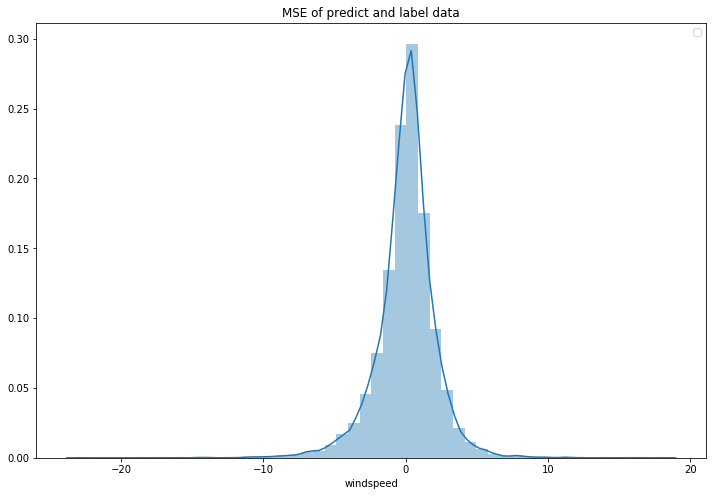

In [47]:
plt.figure(figsize=(12, 8))
plt.title('MSE of predict and label data')
sns.distplot(rf.predict(data_windspeedNot0[cols])-data_windspeedNot0['windspeed'])
plt.legend()

In [48]:
np.std(rf.predict(data_windspeedNot0[cols])-data_windspeedNot0['windspeed'])

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


2.0709585214103057

In [49]:
data_windspeed0.loc[:, 'windspeed'] = rf.predict(data_windspeed0[cols])

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


#### 將處理完的windspeed數據合併起來

In [50]:
data = pd.concat([data_windspeed0, data_windspeedNot0], axis=0)

In [51]:
data = data.sort_values(by='datetime')
data = data.reset_index(drop=True)

In [52]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,week,year,weekofyear,day
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.825395,14.120173,191.574132,11.546752,6.537775,3.011451,2011.502561,26.601933,15.683411
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.175907,6.862435,181.144454,6.914405,3.438776,2.001966,0.500008,15.017005,8.789373
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,8.000000,6.003200,1.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,8.998100,42.000000,6.000000,4.000000,1.000000,2011.000000,14.000000,8.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,145.000000,12.000000,7.000000,3.000000,2012.000000,27.000000,16.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,18.754915,284.000000,18.000000,10.000000,5.000000,2012.000000,40.000000,23.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,977.000000,23.000000,12.000000,6.000000,2012.000000,52.000000,31.000000


#### 檢視一下成果吧

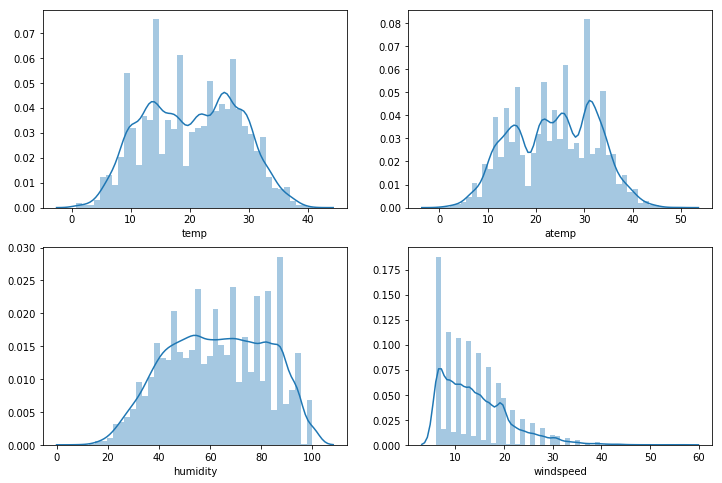

In [53]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(12, 8))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    sns.distplot(data[col])

## 繼續進行其他特徵工程
#### 先來看workingday的count變化吧

In [55]:
data.groupby('count')['year', 'date', 'hour', 'workingday'].median()

,year,hour,workingday
count,,,
1.0,2011.0,4.0,1.0
2.0,2011.0,3.0,1.0
3.0,2011.0,3.0,1.0
4.0,2011.0,3.0,1.0
5.0,2011.0,3.0,1.0
...,...,...,...
943.0,2012.0,17.0,1.0
948.0,2012.0,17.0,1.0
968.0,2012.0,18.0,1.0


In [56]:
date_workingday = data.groupby(['year', 'date', 'hour', 'workingday'], as_index=False).agg({'count':'median'})
date_workingday.head(10)

,year,date,hour,workingday,count
0,2011,2011-01-01,0,0,16.0
1,2011,2011-01-01,1,0,40.0
2,2011,2011-01-01,2,0,32.0
3,2011,2011-01-01,3,0,13.0
4,2011,2011-01-01,4,0,1.0
5,2011,2011-01-01,5,0,1.0
6,2011,2011-01-01,6,0,2.0
7,2011,2011-01-01,7,0,3.0
8,2011,2011-01-01,8,0,8.0
9,2011,2011-01-01,9,0,14.0


#### working=0

Text(0, 0.5, 'median of count')

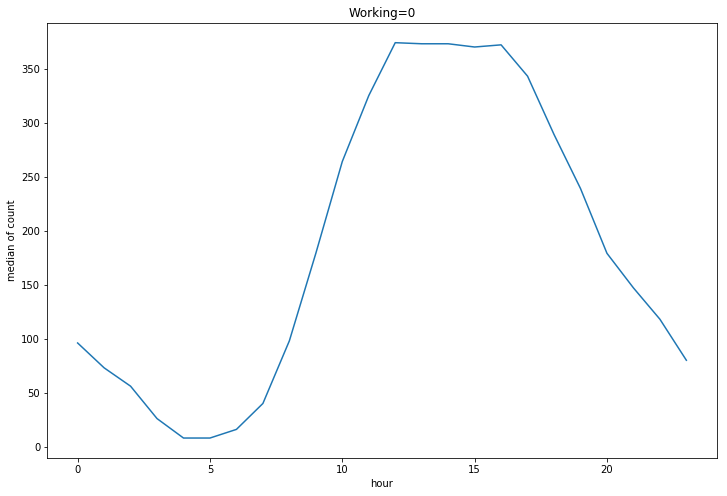

In [57]:
graph_workingday = date_workingday[date_workingday['workingday']==0]
plt.figure(figsize=(12, 8))
plt.title('Working=0')
plt.plot(graph_workingday.groupby('hour')['count'].median().index, graph_workingday.groupby('hour')['count'].median().values)
plt.xlabel('hour')
plt.ylabel('median of count')

Text(0, 0.5, 'median of count')

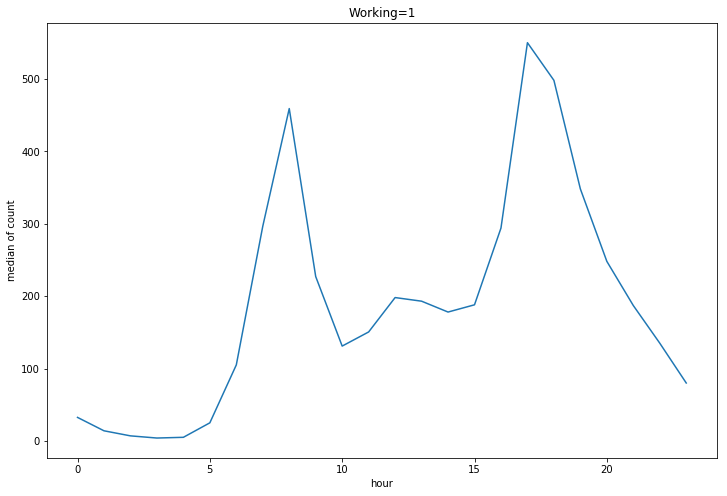

In [58]:
graph_workingday = date_workingday[date_workingday['workingday']==1]
plt.figure(figsize=(12, 8))
plt.title('Working=1')
plt.plot(graph_workingday.groupby('hour')['count'].median().index, graph_workingday.groupby('hour')['count'].median().values)
plt.xlabel('hour')
plt.ylabel('median of count')

### 看得出來某些時刻數量較大
### 那holiday呢?

In [59]:
date_holiday = data.groupby(['year', 'date', 'hour', 'holiday'], as_index=False).agg({'count':'median'})

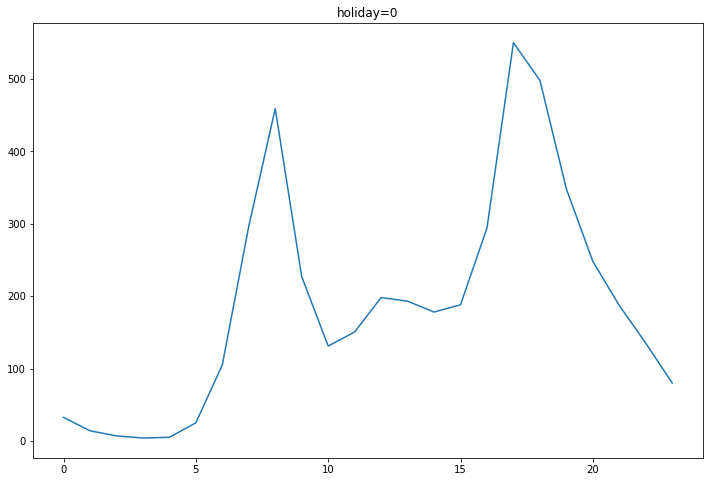

In [60]:
graph_holiday = date_holiday[date_holiday['holiday']==0]
plt.figure(figsize=(12, 8))
plt.title('holiday=0')
plt.plot(graph_workingday.groupby('hour')['count'].median().index, graph_workingday.groupby('hour')['count'].median().values)

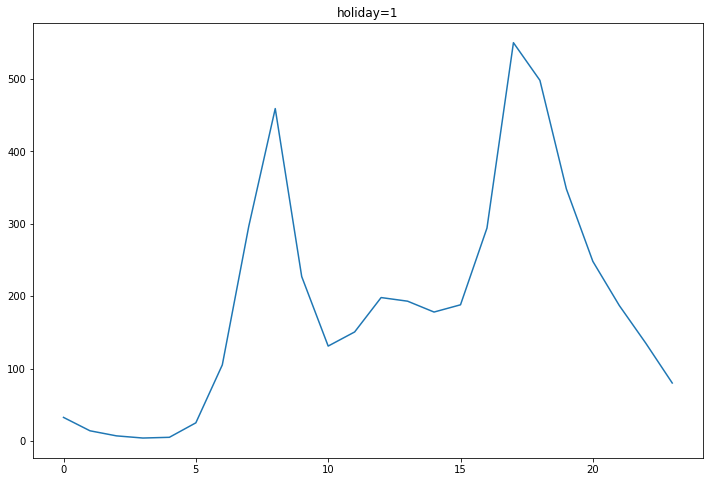

In [61]:
graph_holiday = date_holiday[date_holiday['holiday']==1]
plt.figure(figsize=(12, 8))
plt.title('holiday=1')
plt.plot(graph_workingday.groupby('hour')['count'].median().index, graph_workingday.groupby('hour')['count'].median().values)

### 其他項次

In [62]:
cols = ['season', 'weather', 'week', 'month', 'holiday', 'workingday', 'hour', 'day', 'weekofyear']

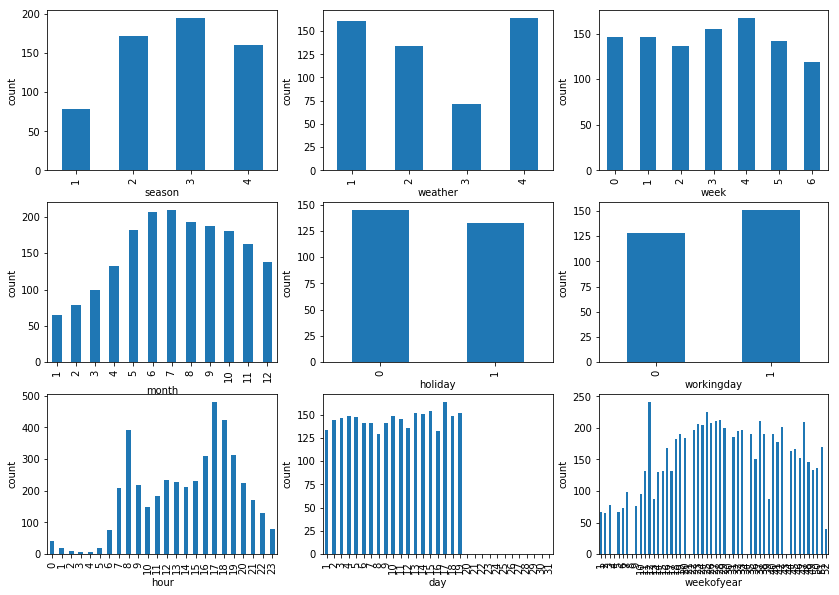

In [63]:
plt.figure(figsize=(14, 10))
for index, col in enumerate(cols):
    plt.subplot(3, 3, index+1)
    data.groupby([col])['count'].median().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('count')

### holiday跟workingday的差異較不明顯, 依上方holiday與workingday的圖表來區分
#### working=0時, hour=10~19的count較大
#### working=1時, hour=8 or 17~18 or 12~13的count較大

In [64]:
data['peak'] = data[['hour', 'workingday']].apply(lambda x : (0, 1)[(x['workingday']==1 and (x['hour']==8 or 17<=x['hour']<=18 or 12<=x['hour']<=13)) or x['workingday']==0 and 10<=x['hour']<=19], axis=1)

In [65]:
data['sleepy'] = data[['hour']].apply(lambda x : (0, 1)[5>=x['hour']>=0], axis=1)

#### 若符合聖誕節前後日子與萬聖節會為1, 其餘依原始圖表

In [66]:
data['holiday'] = data[['month', 'day', 'holiday', 'year']].apply(lambda x: (x['holiday'], 1)[x['year'] == 2012 and x['month'] == 10 and (x['day'] in [30])], axis = 1)
data['holiday'] = data[['month', 'day', 'holiday']].apply(lambda x: (x['holiday'], 1)[x['month'] == 12 and (x['day'] in [24, 26, 31])], axis = 1)
data['workingday'] = data[['month', 'day', 'workingday']].apply(lambda x: (x['workingday'], 0)[x['month'] == 12 and x['day'] in [24, 31]], axis = 1)

#### 再來檢查temp, atemp, windspeed, humidity的關係

In [67]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']

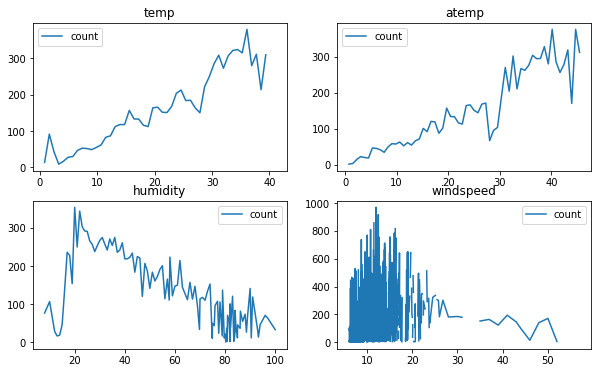

In [68]:
plt.figure(figsize=(10, 6))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    plt.title(col)
    plt.plot(data.groupby([col]).agg({'count':'median'}).index, data.groupby([col]).agg({'count':'median'})['count'])
    plt.legend()

In [69]:
data['ideal'] = data[['windspeed', 'temp']].apply(lambda x : (0, 1)[x['temp']>27 and x['windspeed']<30], axis=1)
data['sticky'] = data[['humidity', 'workingday']].apply(lambda x : (0, 1)[x['workingday']==1 and x['humidity']>=60], axis=1)

#### 特徵工程提取特徵暫時到此，有看到windspeed另外一種算法，以下新增，到最後再決定是否要提取

In [70]:
data['windspeed_2'] = (1.07*data['temp'] + 0.2*data['humidity']/100*6.105*np.exp((17.27*data['temp'])/(273.7+data['temp'])))/0.65

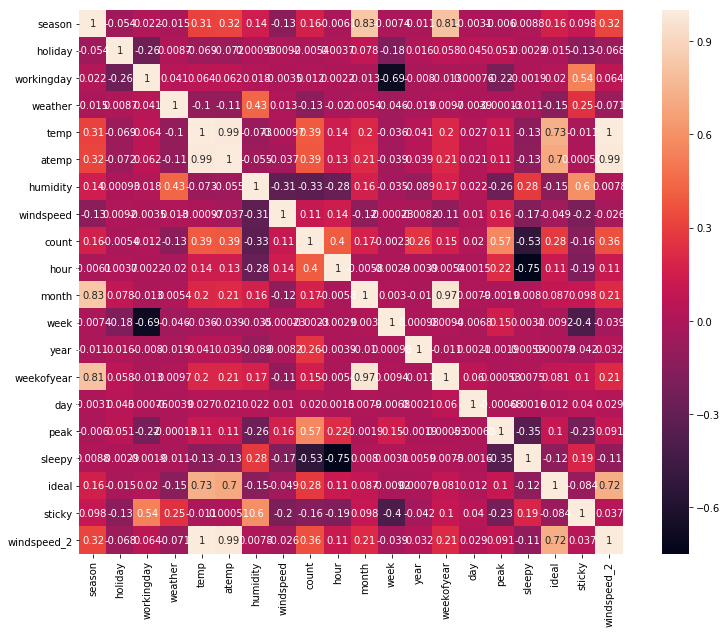

In [71]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, square=True)

In [72]:
data.corr()['count'].sort_values(ascending=False)

count          1.000000
peak           0.568445
hour           0.400601
temp           0.394454
atemp          0.389784
windspeed_2    0.364048
ideal          0.281737
year           0.260403
month          0.166862
season         0.163439
weekofyear     0.152512
windspeed      0.111634
day            0.019826
workingday     0.011594
week          -0.002283
holiday       -0.005393
weather       -0.128655
sticky        -0.155730
humidity      -0.328174
sleepy        -0.525497
Name: count, dtype: float64

In [73]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,week,year,weekofyear,day,date,peak,sleepy,ideal,sticky,windspeed_2
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,6.892504,16.0,...,5,2011,52,1,2011-01-01,0,1,0,0,18.968776
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,6.674701,40.0,...,5,2011,52,1,2011-01-01,0,1,0,0,17.455562
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,6.596699,32.0,...,5,2011,52,1,2011-01-01,0,1,0,0,17.455562
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,6.460689,13.0,...,5,2011,52,1,2011-01-01,0,1,0,0,18.763545
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,6.305919,1.0,...,5,2011,52,1,2011-01-01,0,1,0,0,18.763545


### 分為2部分進行，原始資料去跑model跟One Hot Encoding&Standard後去跑model

In [74]:
data_onehot = data.copy()

### One Hot Encoding

In [75]:
from sklearn.base import TransformerMixin

class CustomerDummifier(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cols, prefix_sep='_')
    
    def fit(self, *_):
        return self

In [76]:
cols = ['month', 'season', 'weather', 'year', 'holiday', 'week']

cd = CustomerDummifier(cols=cols)

data_onehot = cd.fit_transform(data_onehot)

In [77]:
data_onehot.head()

,datetime,workingday,temp,atemp,humidity,windspeed,count,hour,weekofyear,day,...,year_2012,holiday_0,holiday_1,week_0,week_1,week_2,week_3,week_4,week_5,week_6
0,2011-01-01 00:00:00,0,9.84,14.395,81.0,6.892504,16.0,0,52,1,...,0,1,0,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,0,9.02,13.635,80.0,6.674701,40.0,1,52,1,...,0,1,0,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,0,9.02,13.635,80.0,6.596699,32.0,2,52,1,...,0,1,0,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,0,9.84,14.395,75.0,6.460689,13.0,3,52,1,...,0,1,0,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,0,9.84,14.395,75.0,6.305919,1.0,4,52,1,...,0,1,0,0,0,0,0,0,1,0


In [78]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'hour', 'month', 'week',
       'year', 'weekofyear', 'day', 'date', 'peak', 'sleepy', 'ideal',
       'sticky', 'windspeed_2'],
      dtype='object')

In [79]:
data_onehot['windspeed_2']

0        18.968776
1        17.455562
2        17.455562
3        18.763545
4        18.763545
           ...    
17374    19.701383
17375    19.701383
17376    19.701383
17377    19.557824
17378    19.880831
Name: windspeed_2, Length: 17379, dtype: float64

### 將連續值的數值分區間與進行LabelEncoder

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
def data_cut(data, bins, cols, col_new_list):
    label = LabelEncoder()
    for col in cols:
        print('This columns : ', col)
        cols_width = col+'_width'
        col_new_list.append(cols_width)
        data[cols_width] = pd.cut(data[col], bins=bins)
        data[cols_width] = label.fit_transform(data[cols_width]) 

In [82]:
col_new_list=[]

In [83]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'windspeed_2']

In [84]:
data_cut(data=data_onehot, bins=4, cols=cols, col_new_list=col_new_list)

This columns :  temp
This columns :  atemp
This columns :  humidity
This columns :  windspeed
This columns :  windspeed_2


In [85]:
data_onehot.head()

,datetime,workingday,temp,atemp,humidity,windspeed,count,hour,weekofyear,day,...,week_2,week_3,week_4,week_5,week_6,temp_width,atemp_width,humidity_width,windspeed_width,windspeed_2_width
0,2011-01-01 00:00:00,0,9.84,14.395,81.0,6.892504,16.0,0,52,1,...,0,0,0,1,0,0,1,3,0,0
1,2011-01-01 01:00:00,0,9.02,13.635,80.0,6.674701,40.0,1,52,1,...,0,0,0,1,0,0,1,3,0,0
2,2011-01-01 02:00:00,0,9.02,13.635,80.0,6.596699,32.0,2,52,1,...,0,0,0,1,0,0,1,3,0,0
3,2011-01-01 03:00:00,0,9.84,14.395,75.0,6.460689,13.0,3,52,1,...,0,0,0,1,0,0,1,2,0,0
4,2011-01-01 04:00:00,0,9.84,14.395,75.0,6.305919,1.0,4,52,1,...,0,0,0,1,0,0,1,2,0,0


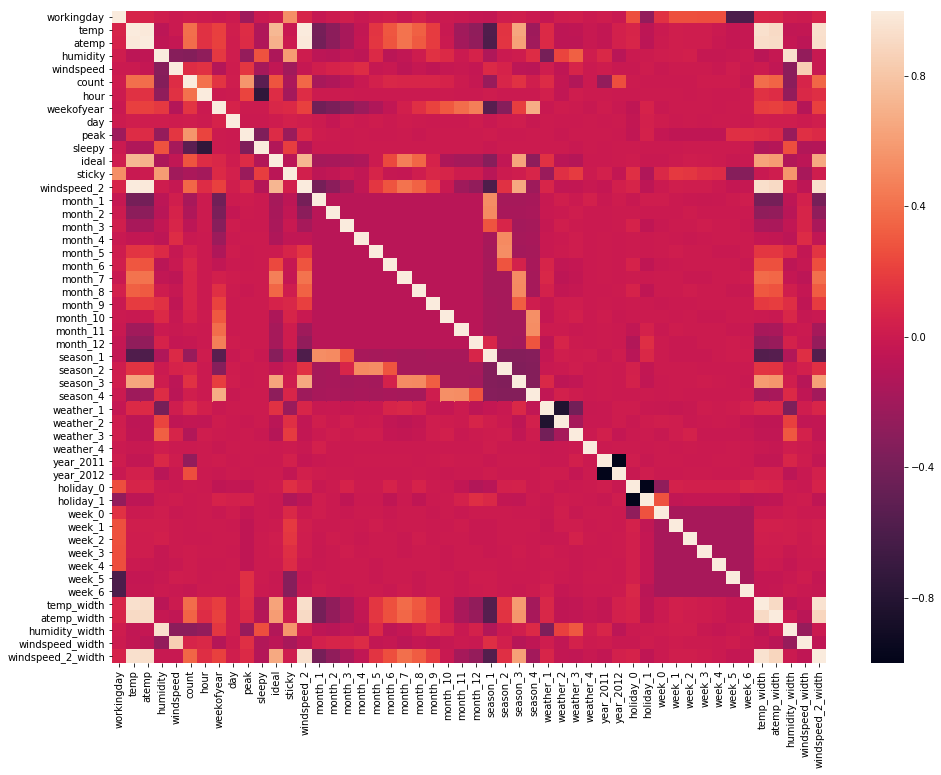

In [86]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_onehot.corr())

In [87]:
data_onehot.corr()['count'].sort_values(ascending=False)

count                1.000000
peak                 0.568445
hour                 0.400601
temp                 0.394454
atemp                0.389784
temp_width           0.383560
windspeed_2          0.364048
windspeed_2_width    0.359346
atemp_width          0.345194
ideal                0.281737
year_2012            0.260403
weekofyear           0.152512
season_3             0.136942
windspeed            0.111634
weather_1            0.105246
month_6              0.084233
season_2             0.075681
month_7              0.073038
month_8              0.071023
month_9              0.070374
windspeed_width      0.063642
month_10             0.060271
month_5              0.046551
season_4             0.023704
day                  0.019826
week_4               0.013993
week_3               0.012886
week_5               0.011599
workingday           0.011594
holiday_0            0.005393
month_11             0.003509
weather_4           -0.001459
week_0              -0.002663
week_1    

#### 要去處理非0-1之間的數值，會影響計算

In [88]:
data_onehot.head()

,datetime,workingday,temp,atemp,humidity,windspeed,count,hour,weekofyear,day,...,week_2,week_3,week_4,week_5,week_6,temp_width,atemp_width,humidity_width,windspeed_width,windspeed_2_width
0,2011-01-01 00:00:00,0,9.84,14.395,81.0,6.892504,16.0,0,52,1,...,0,0,0,1,0,0,1,3,0,0
1,2011-01-01 01:00:00,0,9.02,13.635,80.0,6.674701,40.0,1,52,1,...,0,0,0,1,0,0,1,3,0,0
2,2011-01-01 02:00:00,0,9.02,13.635,80.0,6.596699,32.0,2,52,1,...,0,0,0,1,0,0,1,3,0,0
3,2011-01-01 03:00:00,0,9.84,14.395,75.0,6.460689,13.0,3,52,1,...,0,0,0,1,0,0,1,2,0,0
4,2011-01-01 04:00:00,0,9.84,14.395,75.0,6.305919,1.0,4,52,1,...,0,0,0,1,0,0,1,2,0,0


In [89]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'windspeed_2']

### Standard

In [90]:
def standard(data, cols):
    for col in cols:
        print('This is : ', col)
        mean = np.mean(data[col])
        std = np.std(data[col])
        data[col] = data[col].apply(lambda x : (x-mean)/std)
    return data

In [91]:
standard(data_onehot, cols)

This is :  temp
This is :  atemp
This is :  humidity
This is :  windspeed
This is :  windspeed_2


,datetime,workingday,temp,atemp,humidity,windspeed,count,hour,weekofyear,day,...,week_2,week_3,week_4,week_5,week_6,temp_width,atemp_width,humidity_width,windspeed_width,windspeed_2_width
0,2011-01-01 00:00:00,0,-1.334648,-1.093281,0.947811,-1.053252,16.0,0,52,1,...,0,0,0,1,0,0,1,3,0,0
1,2011-01-01 01:00:00,0,-1.438516,-1.181732,0.895660,-1.084992,40.0,1,52,1,...,0,0,0,1,0,0,1,3,0,0
2,2011-01-01 02:00:00,0,-1.438516,-1.181732,0.895660,-1.096359,32.0,2,52,1,...,0,0,0,1,0,0,1,3,0,0
3,2011-01-01 03:00:00,0,-1.334648,-1.093281,0.634909,-1.116179,13.0,3,52,1,...,0,0,0,1,0,0,1,2,0,0
4,2011-01-01 04:00:00,0,-1.334648,-1.093281,0.634909,-1.138733,1.0,4,52,1,...,0,0,0,1,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,0,-1.230779,-1.269602,-0.147345,-0.454483,NaN,19,1,31,...,0,0,0,0,0,0,1,2,0,1
17375,2012-12-31 20:00:00,0,-1.230779,-1.269602,-0.147345,-0.454483,NaN,20,1,31,...,0,0,0,0,0,0,1,2,0,1
17376,2012-12-31 21:00:00,0,-1.230779,-1.269602,-0.147345,-0.454483,NaN,21,1,31,...,0,0,0,0,0,0,1,2,0,1
17377,2012-12-31 22:00:00,0,-1.230779,-1.181732,-0.355946,-0.746414,NaN,22,1,31,...,0,0,0,0,0,0,1,2,0,0


In [92]:
data_onehot.head()

,datetime,workingday,temp,atemp,humidity,windspeed,count,hour,weekofyear,day,...,week_2,week_3,week_4,week_5,week_6,temp_width,atemp_width,humidity_width,windspeed_width,windspeed_2_width
0,2011-01-01 00:00:00,0,-1.334648,-1.093281,0.947811,-1.053252,16.0,0,52,1,...,0,0,0,1,0,0,1,3,0,0
1,2011-01-01 01:00:00,0,-1.438516,-1.181732,0.895660,-1.084992,40.0,1,52,1,...,0,0,0,1,0,0,1,3,0,0
2,2011-01-01 02:00:00,0,-1.438516,-1.181732,0.895660,-1.096359,32.0,2,52,1,...,0,0,0,1,0,0,1,3,0,0
3,2011-01-01 03:00:00,0,-1.334648,-1.093281,0.634909,-1.116179,13.0,3,52,1,...,0,0,0,1,0,0,1,2,0,0
4,2011-01-01 04:00:00,0,-1.334648,-1.093281,0.634909,-1.138733,1.0,4,52,1,...,0,0,0,1,0,0,1,2,0,0


In [93]:
train = data_onehot[pd.notnull(data_onehot['count'])]
test = data_onehot[~pd.notnull(data_onehot['count'])]

In [94]:
y_train = np.log(train['count'])

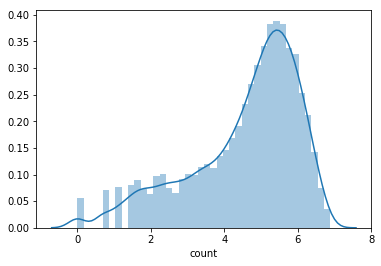

In [95]:
sns.distplot(y_train)

In [96]:
train.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'hour', 'weekofyear', 'day', 'date', 'peak', 'sleepy', 'ideal',
       'sticky', 'windspeed_2', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'year_2011',
       'year_2012', 'holiday_0', 'holiday_1', 'week_0', 'week_1', 'week_2',
       'week_3', 'week_4', 'week_5', 'week_6', 'temp_width', 'atemp_width',
       'humidity_width', 'windspeed_width', 'windspeed_2_width'],
      dtype='object')

In [97]:
x_train = train.drop(['count', 'datetime', 'day', 'date'], axis=1)

In [98]:
test = test.drop(['count', 'datetime', 'day', 'date'], axis=1)

In [99]:
train_origin = data[pd.notnull(data['count'])]
test_origin = data[~pd.notnull(data['count'])]

In [100]:
x_train_origin = train_origin.drop(['count', 'datetime', 'day', 'date'], axis=1)

In [101]:
test_origin = test_origin.drop(['count', 'datetime', 'day', 'date'], axis=1)

### 搜尋最佳參數

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
def get_best_model_and_accuracy(model, param, x, y):
    grid = GridSearchCV(model, param, error_score=0)
    grid.fit(x, y)
    print('Best accuracy : ', grid.best_score_)
    print('Best parameters : ', grid.best_params_)
    print('Average time to fit : ', round(grid.cv_results_['mean_fit_time'].mean(), 3))

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
def report_output(model, test, datetimecol):
    preds = model.predict(test)
    submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(preds)]
    })
    submission.to_csv('bike_predictions_RF.csv', index=False)

In [184]:
x_train_origin['windspeed_2'].head()

0    18.968776
1    17.455562
2    17.455562
3    18.763545
4    18.763545
Name: windspeed_2, dtype: float64

### 先不用最佳參數去找解

In [185]:
rf_model = RandomForestRegressor(n_estimators=500)

In [186]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## 使用RMSprop評估模型

In [187]:
y_pred = rf_model.predict(x_train)

In [188]:
mean_squared_error(y_train, y_pred)

0.014852065093556417

In [189]:
report_output(rf_model, test, datetimecol)

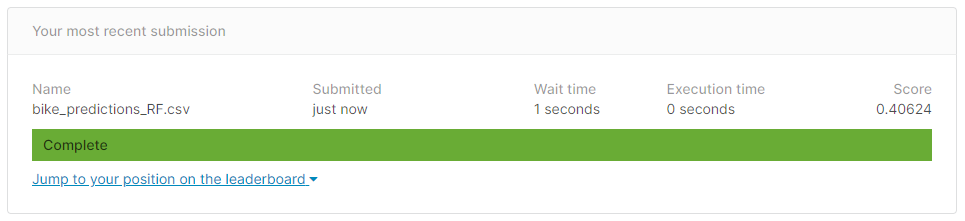

## 改使用原本的模型(較簡易)

In [122]:
rf_model = RandomForestRegressor(n_estimators=500)

In [124]:
rf_model.fit(x_train_origin, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [125]:
y_pred = rf_model.predict(x_train_origin)

In [126]:
mean_squared_error(y_train, y_pred)

0.014632044605444665

In [128]:
report_output(rf_model, test_origin, datetimecol)

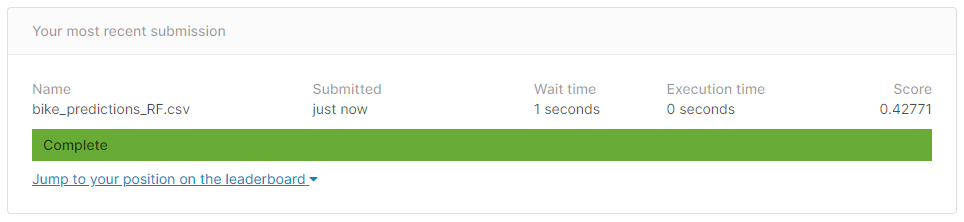

In [133]:
x_train['windspeed_2'].head()

0    18.968776
1    17.455562
2    17.455562
3    18.763545
4    18.763545
Name: windspeed_2, dtype: float64

## RandomForestRegressor

In [749]:
rf_model = RandomForestRegressor()

In [750]:
rf_params = {'n_estimators':[500, 1000, 1500, 2000], 'min_samples_leaf':[25, 50, 75, 100], 'max_depth':[1, 2, 3, 4], 'oob_score':[True, False]}

In [751]:
get_best_model_and_accuracy(model=rf_model, param=rf_params, x=x_train, y=y_train)

Best accuracy :  0.6929236120551681
Best parameters :  {'max_depth': 4, 'min_samples_leaf': 25, 'n_estimators': 1500, 'oob_score': False}
Average time to fit :  8.506


In [146]:
rfModel = RandomForestRegressor(n_estimators=2000,random_state=42)
rfModel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [147]:
y_pred = rfModel.predict(x_train)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


## 使用RMSprop評估模型

In [113]:
from sklearn.metrics import mean_squared_error

In [148]:
mean_squared_error(y_train, y_pred)

0.014830211410959694

In [150]:
report_output(rfModel, test, datetimecol)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


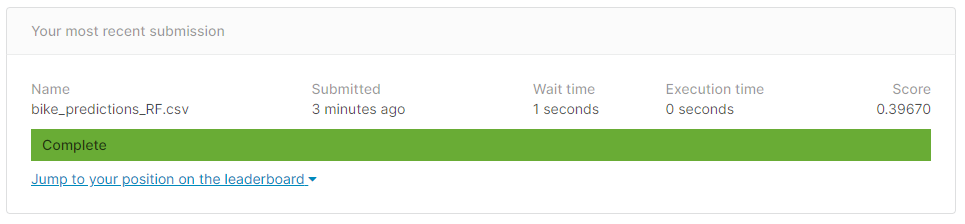

#### new parameters

In [754]:
rfModel = RandomForestRegressor(n_estimators=1500, random_state=42, max_depth=4, min_samples_leaf=25, oob_score=False)
rfModel.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=25, n_estimators=1500,
                      random_state=42)

In [755]:
y_pred = rfModel.predict(x_train)

In [756]:
mean_squared_error(y_train, y_pred)

0.45767060377402524

#### 要比0.014高

In [728]:
test = test.drop(['count'], axis=1)

In [729]:
preds = rfModel.predict(test)

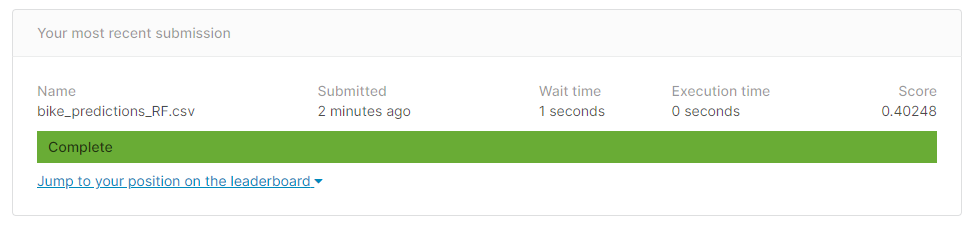

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

## GradientBoostingRegression

In [752]:
gbdt = GradientBoostingRegressor()
gbdt_params = {'n_estimators':[500, 1000, 2000, 2500], 'max_depth ':[1, 2, 3, 4, 5], 'min_samples_leaf':[1, 5, 10, 15, 20]}
get_best_model_and_accuracy(model=rf_model, param=rf_params, x=x_train, y=y_train)

Best accuracy :  0.692507600856249
Best parameters :  {'max_depth': 4, 'min_samples_leaf': 25, 'n_estimators': 1000, 'oob_score': False}
Average time to fit :  8.844


In [151]:
gbdt = GradientBoostingRegressor(n_estimators=2000)

In [152]:
gbdt.fit(x_train, y_train)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1302: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1489: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boostin

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
y_pred = gbdt.predict(x_train)

In [154]:
mean_squared_error(y_train, y_pred)

0.06225110953232582

In [155]:
report_output(rfModel, test, datetimecol)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


#### new parameters

In [141]:
gbdt = GradientBoostingRegressor(n_estimators=1000, max_depth=4)

In [142]:
gbdt.fit(x_train, y_train)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1302: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1489: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boostin

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
y_pred = gbdt.predict(x_train)

In [144]:
mean_squared_error(y_train, y_pred)

0.04763891296594138

In [145]:
report_output(gbdt, test, datetimecol)

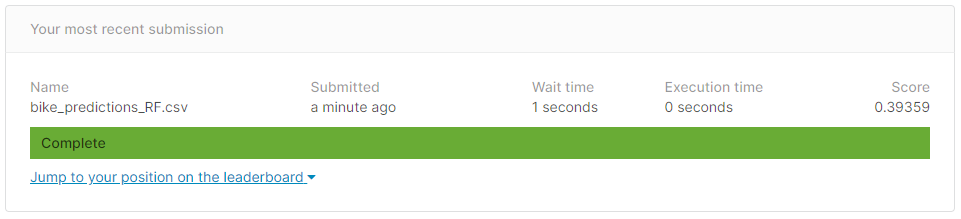

## xgboost

In [107]:
from xgboost import XGBRegressor

In [753]:
xgb = XGBRegressor()
xgb_params = {'n_estimators':[250, 500, 1000, 1500, 2000, 2500], 'max_depth':[1, 2, 3, 4, 5, 6], 'colsample_bytree':[0.4, 0.5, 0.6, 0.8, 1], 'learning_rate':[0.4, 0.5, 0.6, 0.7], 'min_child_weight':[1, 2, 3, 4, 5]}
get_best_model_and_accuracy(model=xgb, param=xgb_params, x=x_train, y=y_train)

Best accuracy :  0.9113778061341975
Best parameters :  {'colsample_bytree': 1, 'learning_rate': 0.7, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500}
Average time to fit :  2.277


In [136]:
xgb = XGBRegressor(n_estimators=500, max_depth=3, colsample_bytree=0.6)

In [137]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=500, n_jobs=8, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [138]:
y_pred = xgb.predict(x_train)

In [139]:
mean_squared_error(y_train, y_pred)

0.07231102118033772

In [140]:
report_output(xgb, test, datetimecol)

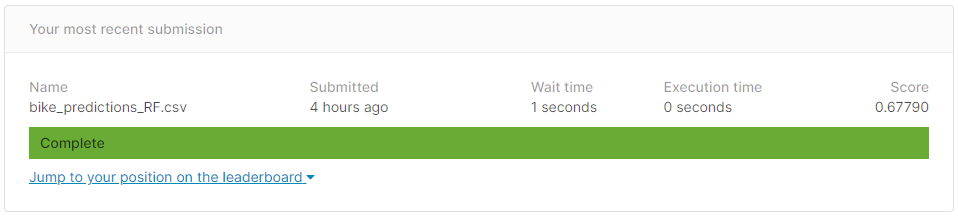

#### new parameters

In [122]:
xgb = XGBRegressor(n_estimators=500, max_depth=2, colsample_bytree=1, learning_rate=0.7, min_child_weight=4)

In [123]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.7, max_delta_step=0, max_depth=2,
       min_child_weight=4, missing=nan, monotone_constraints='()',
       n_estimators=500, n_jobs=8, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [124]:
y_pred = xgb.predict(x_train)

In [125]:
mean_squared_error(y_train, y_pred)

0.09375785490648406

In [131]:
report_output(xgb, test, datetimecol)

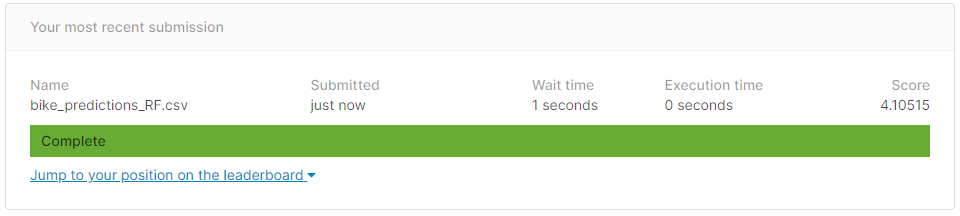

## 找到參數可以用這個函式來做比較整理

In [758]:
from sklearn.pipeline import Pipeline

In [757]:
def model_evalution(model_list, model_column, x_train, y_train, x_test, y_test, preprocessing, decomposition):
    accuracy_list, time_list = [], []
    start_time = time.time()
    for i in model_list:
        start_time = time.time()
        print('{} is working ... '.format(i))
        model = Pipeline([('pp', preprocessing), ('decomposition', decomposition), ('model', i)])
        model.fit(x_train, y_train)
        accuracy_list.append(round(model.score(x_test_transform, y_test), 3))
        print('{} accuracy is : {}'.format(i, round(model.score(x_test_transform, y_test), 3)))
        end_time = time.time()
        time_list.append(round(end_time - start_time, 3))
        print('It costs : {} s.'.format(end_time-start_time))
        print('\n')
    model = pd.DataFrame({'Accuracy':accuracy_list, 'Time':time_list}, index=model_column)
    return model

## 綜合兩個好模型的數值平均結果如何?

In [157]:
gbdt = GradientBoostingRegressor(n_estimators=1000, max_depth=4)
gbdt.fit(x_train, y_train)
y_pred_gbdt = gbdt.predict(test)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1302: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1489: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boostin

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\M

In [158]:
rfModel = RandomForestRegressor(n_estimators=2000,random_state=42)
rfModel.fit(x_train, y_train)
y_pred_rf = rfModel.predict(test)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [159]:
y_pred = (y_pred_gbdt + y_pred_rf)/2

In [160]:
submission = pd.DataFrame({
    "datetime": datetimecol,
    "count": [max(0, x) for x in np.exp(y_pred)]
})
submission.to_csv('bike_predictions_RF.csv', index=False)

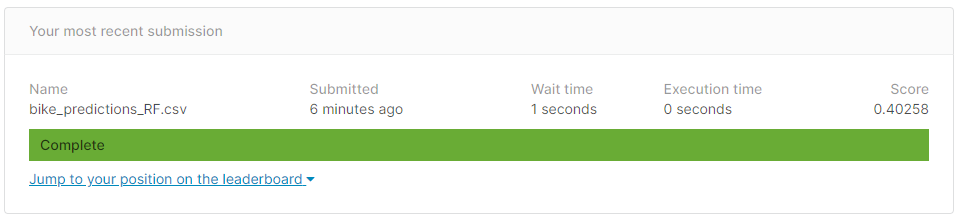

## 改用神經網絡評估呢?

In [ ]:
from keras.mdoels import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation